
# Data Set and Questions

I chose to investigate the **Titanic Data** with the following questions:

> 1. What factors are correlated to whether the passengers survived or not?
> 2. How strong or weak are these possible correlations?

# Data Wrangling - Fixing the Age NaNs problem

First, let's import the necessary libraries and make jupyter display plots inline:

In [1]:
import pandas as pd
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Then use pandas to read the csv file into a dataframe:

In [2]:
df = pd.read_csv('titanic-data.csv')

Since we have no idea about the data set yet, **info()** and **describe()** are good starting points to get a rough first impression.

In [3]:
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


D:\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Looks like we have 891 rows of passenger data, and some values are missing  in the **Age, Cabin, Embarked** columns.

The most gaping issue is that the missing values in the Age column are causing the 25%, 50%, and 75% quintile levels not showing properly and a warning from numpy, so let's fix this one first.

Two solutions are possible: 

> 1. Drop the rows where the Age values are missing.
> 2. Fill in the missing Age cells with a neutral value (median or mean) of the Age column.

Note that a new dataframe will be created in the "dropping" solution so that the original dataframe is preserved; also note that additional columns will be created for the "filling" solutions so that the original column is preserved. Although the new dataframe or the new columns might or might not be used later in the report, they will be available if the necessity to use them do arise in the future.

In [4]:
# Solution 1: drop 'em
df_drop_age_na = df.copy(deep=True)
df_drop_age_na = df_drop_age_na[df_drop_age_na['Age'].notnull()]

# Solution 2a: fill median
df['AgeFillMedian'] = df['Age'].fillna(df['Age'].median())

# Solution 2b: fill mean
df['AgeFillMean'] = df['Age'].fillna(df['Age'].mean())

Check whether the solutions above have worked:

In [5]:
print('All columns in the new dataframe should have no more than 714 rows:\n')
print df_drop_age_na.info(), '\n'

print('The AgeFillMedian and AgeFillMean columns should be filled in properly:\n')

print 'Age median:', df['Age'].median()
print 'Age mean:  ', df['Age'].mean(), '\n'
print(df[['Age', 'AgeFillMedian', 'AgeFillMean']][df['Age'].isnull()].head())

All columns in the new dataframe should have no more than 714 rows:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    714 non-null int64
Survived       714 non-null int64
Pclass         714 non-null int64
Name           714 non-null object
Sex            714 non-null object
Age            714 non-null float64
SibSp          714 non-null int64
Parch          714 non-null int64
Ticket         714 non-null object
Fare           714 non-null float64
Cabin          185 non-null object
Embarked       712 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 72.5+ KB
None 

The AgeFillMedian and AgeFillMean columns should be filled in properly:

Age median: 28.0
Age mean:   29.6991176471 

    Age  AgeFillMedian  AgeFillMean
5   NaN           28.0    29.699118
17  NaN           28.0    29.699118
19  NaN           28.0    29.699118
26  NaN           28.0    29.699118
28  NaN           28.0    29.699118


Yes, they worked! Cabin and Embarked columns can be fixed in similar ways, but I'm not going to do further boring wrangling, instead let's do some fun exploration and visualization! 

# Data Exploration - Survival

I'd like to first explore a little bit on the Survived column, as it sits in the center of our questions. 

How many of the passengers have survived and died respectively? This is a question that **value_counts()** can easily answer. 

In [6]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

549 died and 342 survived. What is the proportion of these two groups with radically different fates? Passing in the parameter of **normalize=True** into value_counts() will return the relative frequencies:

In [7]:
df['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

Nearly 62% of the passengers did not make it, or put it in another way a little more than 38% were lucky. Let's call **plot.pie()** on the dataframe to make a pie chart which can illustrate the comparison between two proportions clearly.

Although the overuses and abuses of pie charts are generally frowned upon by experts, a simple pie chart won't really hurt in this case. Actually with just the dichotomy of survival possibility (instead of multiple categories crammed together), it's quite effective in showing the binary comparison.

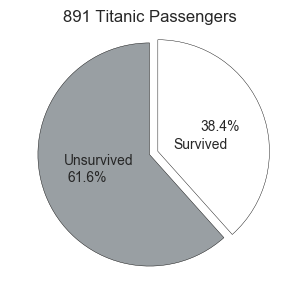

In [8]:
survival = df['Survived'].value_counts()

pie_survival = survival.plot.pie(figsize = (3.6, 3.6), explode = (0, 0.08),
                                 colors  = ('#999FA3', 'white'),
                                 labels  = ('Unsurvived', 'Survived'),
                                 autopct = '%1.1f%%', legend = False, 
                                 startangle = 90, labeldistance = 0.15)

pie_survival.set_ylabel('') # get rid of the ylabel on the left side
pie_survival.set_title('891 Titanic Passengers', y=0.95) # move the title closer to the main chart

Now that we have a general idea about the survival breakdown, let's explore some other factors along with it. 

Because we already know from the movie that women, children, and elderly people were given priority when it came to the who got on the lifeboats, **Age** and **Sex** columns will be examined.

Furthermore, due to the fact that passengers from different cabin classes lived in different decks of the Titanic, which probably made them either easier or more difficult to get to lifeboats in time, the **Pclass** column will also be examined.

## Suvivial by Age

We'll only look at the data available: the Age column in the original dataframe or the "drpped-na" new dataframe, not the AgeFillMedian and AgeFillMean columns, because they represent distortion with a more centered distribution. Besides, becasue we are not investigating multiple independent variables together, in which case ignoring the missing-value rows would miss out on valuable information from other columns, jsut ignoring the missing values is the cautious way to go.

Let's call **plot.hist()** on the dataframe to make a histogram, which will show the shape of the distribution.

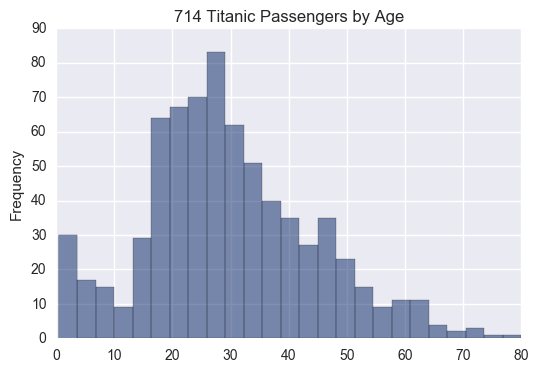

In [9]:
# save the plot setting in a dictionary 
# so that it can be easiliy modified and reused
hist_setting = {'color' : '#032263',
                'title' : '714 Titanic Passengers by Age',
                'alpha' : .5, 
                'bins'  : 25}

df_drop_age_na['Age'].plot.hist(**hist_setting)

We can see that the age frequencies cluster around the range of 20-30 years old, with gradual lower frequencies toward senior years and a sudden drop in the teenage range.

Next let's explore the Survived and Age columns together and see the distributions of ages for those survived and whose not:

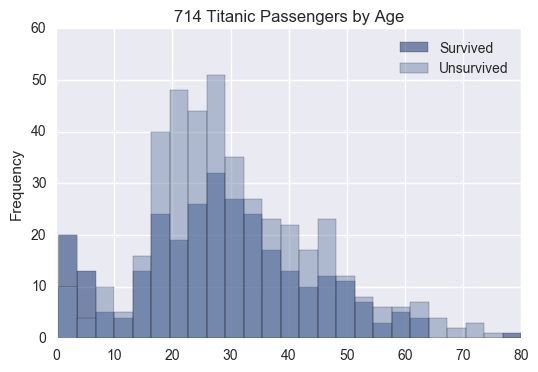

In [10]:
df_age = pd.DataFrame({'Survived'  : df_drop_age_na['Age'][df['Survived'] == 1],
                       'Unsurvived': df_drop_age_na['Age'][df['Survived'] == 0]})

hist_setting['color'] = ('#032263', '#7389AE')

df_age.plot.hist(**hist_setting)

It seems that small children had a higher survival rate, but once the age is above high single digits that more people died than survived in all the buckets. 

(Just to clarify, the above histogram has Survived and Unsurvived frequencies overlayed over each other, not stacked on each other.)

### More Data Wrangling

Let's create a new column to store the category of small children and non small children. I will just use age 6 as the rough dividing criterion, and calculate how the survival rates depend on our newly-created category.

In [11]:
df_drop_age_na.loc[df_drop_age_na['Age'] <= 6, 'IsSmallChildren'] = 1
df_drop_age_na.loc[df_drop_age_na['Age'] > 6, 'IsSmallChildren']  = 0

print df_drop_age_na[df_drop_age_na['IsSmallChildren'] == 1]['Survived'].value_counts(normalize=True), '\n'
print df_drop_age_na[df_drop_age_na['IsSmallChildren'] == 0]['Survived'].value_counts(normalize=True)

1    0.702128
0    0.297872
Name: Survived, dtype: float64 

0    0.614693
1    0.385307
Name: Survived, dtype: float64


The survival rates for male and female are 38.5% and 70.2% respectively.

And then let's use **sns.factorplot()** to visualize those two figures:

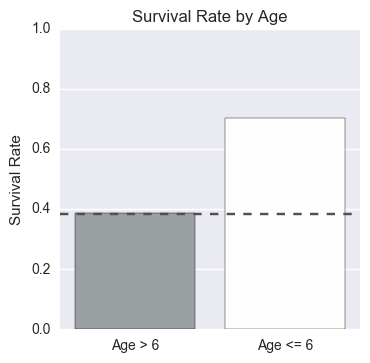

In [12]:
g = sns.factorplot(x='IsSmallChildren', y='Survived', data=df_drop_age_na,
                   palette=('#999FA3', '#FEFEFE'),
                   kind='bar', ci=None, size=3.8)

(g.set_axis_labels('', 'Survival Rate')
  .set_xticklabels(['Age > 6', 'Age <= 6'])
  .set(ylim=(0, 1)))

sns.plt.title('Survival Rate by Age')

# Add the average survival rate as a horizontal dashed line
sns.plt.axhline(y=0.384, linestyle ='--', color='#50514F')



For those older than six, the survival rates seems to be in line with the average; for those younger, the rate seems to be quite higher. But to quantify the possible correlation, we will need to use relevant statistical tools to analyze it later.

## Suvivial by Gender

First let's see the breakdown of passengers by gender:

male      0.647587
female    0.352413
Name: Sex, dtype: float64


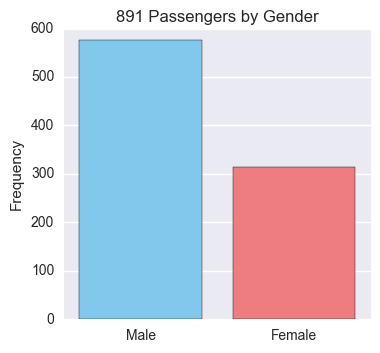

In [13]:
print df['Sex'].value_counts(normalize=True)

g = sns.factorplot(x='Sex', data=df,
                   kind='count', size=3.7,
                   palette=('#70CDFF', '#FF6B70'))

(g.set_axis_labels('', 'Frequency')
  .set_xticklabels(['Male', 'Female']))

sns.plt.title('891 Passengers by Gender')

The proportion of males on board seems to be nearly double that of female (64.8% vs. 35.2%).

Next, the intuitively obvious way to investige the relationship between the Sex and Survived columns seems to be plotting out the proportions of survived vs. unsurvived by gender. So let's just do it:

0    0.811092
1    0.188908
Name: Survived, dtype: float64 

1    0.742038
0    0.257962
Name: Survived, dtype: float64


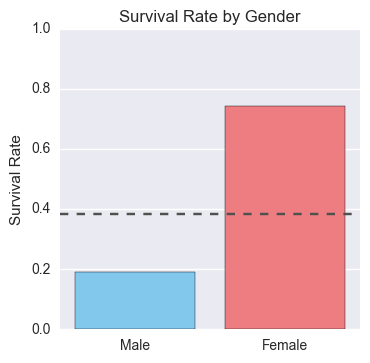

In [14]:
print df[df['Sex'] == 'male']['Survived'].value_counts(normalize=True), '\n'
print df[df['Sex'] == 'female']['Survived'].value_counts(normalize=True)

g = sns.factorplot(x='Sex', y='Survived', data=df,
                   palette=('#70CDFF', '#FF6B70'),
                   kind='bar', ci=None, size=3.8)

(g.set_axis_labels('', 'Survival Rate')
  .set_xticklabels(['Male', 'Female'])
  .set(ylim=(0, 1)))

sns.plt.title('Survival Rate by Gender')
sns.plt.axhline(y=0.384, linestyle ='--', color='#50514F')

As the chart shows, the difference of survival rates between male and female is rather striking (18.9% vs. 74.2%).

## Suvivial by Passenger Class

Let's then do similar visualizations for the Pclass column:

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64


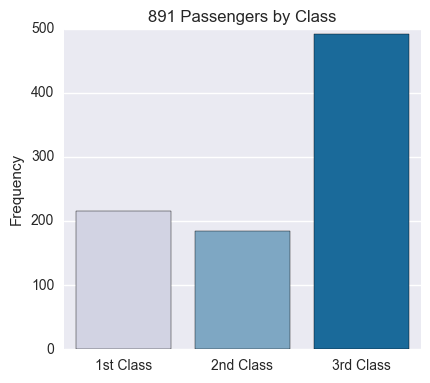

In [15]:
print df['Pclass'].value_counts(normalize=True)

g = sns.factorplot(x='Pclass', data=df, kind='count',
                   palette='PuBu', size=4, aspect=1.05)

(g.set_axis_labels('', 'Frequency')
  .set_xticklabels(['1st Class', '2nd Class', '3rd Class']))

sns.plt.title('891 Passengers by Class')

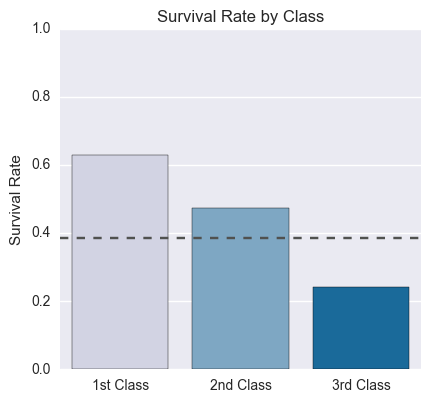

In [16]:
g = sns.factorplot(x='Pclass', y='Survived', data=df,
                   palette='PuBu', kind='bar', ci=None, 
                   size=4.2, aspect=1.05)

(g.set_axis_labels('', 'Survival Rate')
  .set_xticklabels(['1st Class', '2nd Class', '3rd Class'])
  .set(ylim=(0, 1)))

sns.plt.title('Survival Rate by Class')
sns.plt.axhline(y=0.384, linestyle ='--', color='#50514F')

The evidence seems to support that the higher the cabin class, the higher the survival rate, with the 1st and 2nd classes' figures higher than average and the 3rd lower. Howevever, is this really the case?

## Interaction between Passenger Class and Gender

Since we already know that gender difference play a huge role on the survival rate, if the gender proprotions in each cabin class are not equal to that on average, it would be difficult to attribute any possible correlation to the class variable, as it might well have come from the sex variable. 

So let's breakdown the number of passengers in each class by gender:

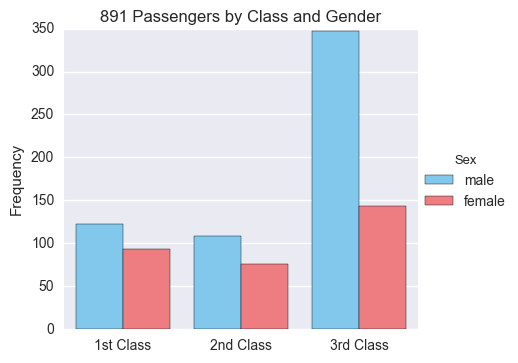

In [17]:
g = sns.factorplot(x='Pclass', hue='Sex', data=df,
                   kind='count', size=3.8, aspect=1.1,
                   palette=('#70CDFF', '#FF6B70'))

(g.set_axis_labels('', 'Frequency')
  .set_xticklabels(['1st Class', '2nd Class', '3rd Class']))

sns.plt.title('891 Passengers by Class and Gender')

As it turns out, 1st and 2nd classes do have a higher porportion of females (which have a higher survival rate) than the roughly 2:1 male-female ratio on average.

Furthermore, cabin class could also have an effect on the survival rate of the female in return. Let's do some more breakdown to see if it is true:

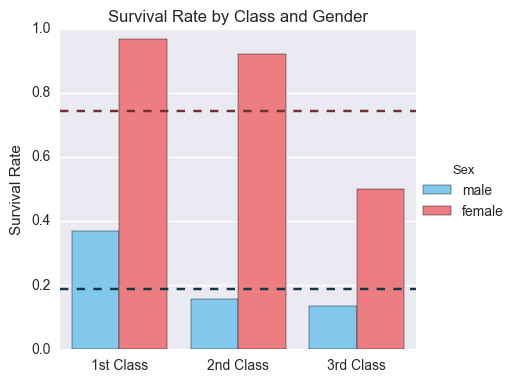

In [18]:
g = sns.factorplot(x='Pclass', y='Survived', hue='Sex', data=df,
                   kind='bar', ci=None, size=4, aspect=1.1,
                   palette=('#70CDFF', '#FF6B70'))

(g.set_axis_labels('', 'Survival Rate')
  .set_xticklabels(['1st Class', '2nd Class', '3rd Class']))

sns.plt.title('Survival Rate by Class and Gender')
sns.plt.axhline(y=0.742, linestyle ='--', color='#743031')
sns.plt.axhline(y=0.189, linestyle ='--', color='#113849')

The moment of truth: the female in the 1st and 2nd classes not only take a larger proportion than average, but also have a higher rate of survival than that of the female themselves on average. Besides, the male in the 1st class also have a higher survival rate than that of the male themselves on average.

So it seems that class and gender factors are interwined in a somewhat complicated way. However, due to the limited range of statistical tools I have mastered so far, this complication will not be examined in this report.

# Data Analysis - Correlation

## Pearson's r and Phi Coefficient

We want to quantify the possible correlation between survival and three other variables: age, gender and cabin class, and the most common statistical tool for this job is Pearson's r (or Phi coefficient in the special case of two binary variables).

I'm too lazy to compute the relevant statistics myself, and the ready-made functions from sklearn and scipy can help me out.

### Survival by Age

For the same reason in the exploration section, we'll calculate the age statistics with just the data we have, ignoring the missing values as filled-in values could cause distortion.

In [19]:
from sklearn.metrics import matthews_corrcoef
from scipy.stats import pearsonr

# To see that these two statistics are the same for two binary variables,
# I'd like to print both of them out, to see for myself whether the results are equal.

cor_age = matthews_corrcoef(df_drop_age_na['Survived'], df_drop_age_na['IsSmallChildren']) 

print(cor_age)
print(pearsonr(df_drop_age_na['Survived'], df_drop_age_na['IsSmallChildren'])[0])

0.159971618111
0.159971618111


### Survival by Gender

In [20]:
cor_gender = matthews_corrcoef(df['Survived'], df['Sex']) 
print(cor_gender)

-0.543351380658


### Survival by Cabin class

In [21]:
cor_class = pearsonr(df['Survived'], df['Pclass'])[0]
print(cor_class)

-0.338481035961


# Conclusion

In [22]:
conclusion = pd.DataFrame({'Correlation': [cor_gender, cor_class, cor_age]}, 
                          index=['Survival by Gender', 'Survival by Cabin Class', 'Survival by Age'])
conclusion

,Correlation
Survival by Gender,-0.543351
Survival by Cabin Class,-0.338481
Survival by Age,0.159972


To answer the questions at the outset: Of the three factors we investigated, it looks that gender has the highest correlation with survival (albeit one with medium stength: -0.543351), the correlation between survival and cabin class is somewhat weaker (-0.338481), and the one between survival and age is very weak (0.159972). (Note that the signs of those statistics are not particularly important in our case; it is the absolute values, i.e. the strength of the correlation, that matter.)

The hypotheses were that any possible correlations might come from the facts that the female and children were put on lifeboats first, and that passenger from higher cabin classes got easy access to lifeboats due to their quarters' proximity to the main deck. The analysis largely supports that women were probably given priority although the correlation is only in the middle range, but the evidence is lacking that children had any significant edge on survival because the correlation is very weak. 

As to the cabin class hypothesis, it is really difficult to say for certain. Although the correlation is in the weak to middle range, theres is the confounding fact that 1st and 2nd classes have more females (with higher survival rate than the male) than on average, which might actually contributed to the correlation in this case. Furthermore, the female in the 1st and 2nd classes in turn have higher rates of survival than that of the female themselves on average, which suggests an interaction between the two variables and it's an complication that this report did not delve deeper into. However, this present opportunities for future investigations.

Finally, a qualifying remark to end this report: the variables in this report were investigated only for their possible correlations with passenager survival, and it should emphasized and reiterated that no causation relationships should be derived or assumed in any way, because we simply do not have the ability to perform experiments on events in the past.

# Resources

[Kaggle Python Tutorial on Machine Learning (Titanic)](https://www.datacamp.com/community/open-courses/kaggle-python-tutorial-on-machine-learning)

[Getting Started With Kaggle (Titanic)](https://www.dataquest.io/mission/74/getting-started-with-kaggle)

[Phi coefficient ](http://math.tutorvista.com/statistics/phi-coefficient.html)

[Compute the Matthews correlation coefficient (MCC) using sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.matthews_corrcoef.html)

[Calculates a Pearson correlation coefficient](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pearsonr.html)

[Pandas Visualization](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html)

[How to remove the label on the left side?](http://stackoverflow.com/questions/34094596/python-matplotlib-pyplot-pie-charts-how-to-remove-the-label-on-the-left-side)

[seaborn.factorplot](http://seaborn.pydata.org/generated/seaborn.factorplot.html#seaborn.factorplot)

